# 1) importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 
from sklearn.model_selection import GridSearchCV
import joblib
from datasist.structdata import detect_outliers
pd.set_option('display.max_columns',None)


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
sns.set(style='whitegrid',rc={'figure.figsize': [10, 10]}, font_scale=1.3)

# 2) Reading data

In [2]:
df=pd.read_csv(r'C:\Users\Abd AL-Rahman\Desktop\web scraping project\csv data\hatla2ee_data.csv')
df.head()

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Comfort,Windows,Sound,Others,Price
0,Make\nDaewoo,Model\nLanos,Used since\n1999,"Km\n231,000 Km",Transmission\nmanual,City\nEl Marg,Color\nDark red,Fuel\ngas,Comfort\ncheck\nLeather seats\ncheck\nPower St...,Windows\ncheck\nFront Power Windows,Sound System\ncheck\nCassette Radio\ncheck\nAU...,Other\ncheck\nAlloy wheels,"78,000 EGP"
1,Make\nKia,Model\nGrand Cerato,Used since\n2020,"Km\n47,000 Km",Transmission\nautomatic,City\nEl Haram,Color\nLight grey,Fuel\ngas,Comfort\ncheck\nPower Steering\ncheck\nIntelli...,Windows\ncheck\nFront Power Windows\ncheck\nBa...,Sound System\ncheck\nDVD Player\ncheck\nCD Pla...,Other\ncheck\nAlloy wheels\ncheck\nCentral loc...,"450,000 EGP"
2,Make\nMG,Model\n5,Used since\n2021,"Km\n28,000 Km",Transmission\nautomatic,City\nEl Haram,Color\nRed,Fuel\ngas,Comfort\ncheck\nAir Conditioning\ncheck\nElect...,Windows\ncheck\nFront Power Windows\ncheck\nBa...,Sound System\ncheck\nCD Changer\ncheck\nDVD Pl...,Other\ncheck\nAlloy wheels\ncheck\nAlarm\nchec...,"340,000 EGP"
3,Make\nMG,Model\nZS,Used since\n2020,"Km\n21,000 Km",Transmission\nautomatic,City\nEl Haram,Color\nRed,Fuel\ngas,Comfort\ncheck\nElectric mirrors\ncheck\nLeath...,Windows\ncheck\nFront Power Windows\ncheck\nBa...,Sound System\ncheck\nCD Changer\ncheck\nAUX\nc...,Other\ncheck\nAlloy wheels\ncheck\nCruise cont...,"360,000 EGP"
4,Make\nSkoda,Model\nOctavia A8,Nan,"Km\n16,000 Km",Transmission\nDSG,City\nHeliopolis,Color\nRed,Fuel\ngas,Comfort\ncheck\nLeather seats\ncheck\nMultimed...,Windows\ncheck\nFront Power Windows\ncheck\nBa...,Sound System\ncheck\nMultifunction\ncheck\nAUX...,Other\ncheck\nAlloy wheels\ncheck\nAlarm\nchec...,"890,000 EGP"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32480 entries, 0 to 32479
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          32480 non-null  object
 1   Model         32480 non-null  object
 2   UsedSince     32480 non-null  object
 3   KiloMeters    32480 non-null  object
 4   Transmission  32480 non-null  object
 5   City          32480 non-null  object
 6   Color         32480 non-null  object
 7   Fuel          32480 non-null  object
 8   Comfort       32480 non-null  object
 9   Windows       32480 non-null  object
 10  Sound         32480 non-null  object
 11  Others        32480 non-null  object
 12  Price         32480 non-null  object
dtypes: object(13)
memory usage: 3.2+ MB


# 3) data cleaning and procsseing 

In [4]:
df['Make']=df['Make'].apply(lambda x: x.split('Make\n')[-1])
df['Model']=df['Model'].apply(lambda x: x.split('Model\n')[-1])
df['UsedSince']=df['UsedSince'].apply(lambda x: x.split('Used since\n')[-1])
df['Transmission']=df['Transmission'].apply(lambda x: x.split('Transmission\n')[-1])
df['City']=df['City'].apply(lambda x: x.split('City\n')[-1])
df['Color']=df['Color'].apply(lambda x: x.split('Color\n')[-1])
df['Fuel']=df['Fuel'].apply(lambda x: x.split('Fuel\n')[-1])
df['Price']=df['Price'].apply(lambda x: x.replace('EGP','').replace(',',''))
df['KiloMeters']=df['KiloMeters'].apply(lambda x: x.replace('Km\n','').replace('Km','').replace(',',''))
df['Comfort']=df['Comfort'].apply(lambda x: x.replace('Comfort\n','').replace('check\n','').replace('\n',''))
df['Windows']=df['Windows'].apply(lambda x: x.replace('Windows\n','').replace('check\n','').replace('\n',''))
df['Sound']=df['Sound'].apply(lambda x: x.replace('Sound System\n','').replace('check\n','').replace('\n',''))
df['Others']=df['Others'].apply(lambda x: x.replace('Other\n','').replace('check\n','').replace('\n',''))

In [5]:
df.head()

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Comfort,Windows,Sound,Others,Price
0,Daewoo,Lanos,1999,231000,manual,El Marg,Dark red,gas,Leather seatsPower Steering,Front Power Windows,Cassette RadioAUXCD ChangerUSB PortDVD PlayerB...,Alloy wheels,78000
1,Kia,Grand Cerato,2020,47000,automatic,El Haram,Light grey,gas,Power SteeringIntelligent parking systemElectr...,Front Power Back Power Tinted Glass,DVD PlayerCD PlayerAUXUSB PortBluetooth,Alloy wheelsCentral lockRear cameraGPSRear spo...,450000
2,MG,5,2021,28000,automatic,El Haram,Red,gas,Air ConditioningElectric mirrorsRemote Keyless...,Front Power Back Power Windows,CD ChangerDVD PlayerCD PlayerCassette Radio,Alloy wheelsAlarmPower SeatsFog light,340000
3,MG,ZS,2020,21000,automatic,El Haram,Red,gas,Electric mirrorsLeather seatsAir ConditioningF...,Front Power Back Power Windows,CD ChangerAUXDVD PlayerUSB PortCD PlayerBlueto...,Alloy wheelsCruise controlAlarmCentral lockPow...,360000
4,Skoda,Octavia A8,Nan,16000,DSG,Heliopolis,Red,gas,Leather seatsMultimedia touch screenTouch acti...,Front Power Back Power Tinted Glass,MultifunctionAUXUSB PortBluetooth,Alloy wheelsAlarmFog lightCentral lockRear cam...,890000


In [6]:
df.replace('Nan',np.NaN,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32480 entries, 0 to 32479
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          32391 non-null  object
 1   Model         32375 non-null  object
 2   UsedSince     28614 non-null  object
 3   KiloMeters    32391 non-null  object
 4   Transmission  32391 non-null  object
 5   City          32399 non-null  object
 6   Color         32391 non-null  object
 7   Fuel          32390 non-null  object
 8   Comfort       26157 non-null  object
 9   Windows       20684 non-null  object
 10  Sound         22307 non-null  object
 11  Others        19900 non-null  object
 12  Price         32448 non-null  object
dtypes: object(13)
memory usage: 3.2+ MB


In [8]:
df.isnull().sum()

Make               89
Model             105
UsedSince        3866
KiloMeters         89
Transmission       89
City               81
Color              89
Fuel               90
Comfort          6323
Windows         11796
Sound           10173
Others          12580
Price              32
dtype: int64

In [9]:
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Color'].fillna(df['Color'].mode()[0],inplace=True)
df['Fuel'].fillna(df['Fuel'].mode()[0],inplace=True)
df['Windows'].fillna(df['Windows'].mode()[0],inplace=True)
df['Sound'].fillna(df['Sound'].mode()[0],inplace=True)
df['Others'].fillna(df['Others'].mode()[0],inplace=True)

In [10]:
df.dropna(axis=0,inplace=True,subset=['Price', 'KiloMeters'])

In [11]:
df['KiloMeters']=df['KiloMeters'].apply(lambda x: int(x))
df['Price']=df['Price'].apply(lambda x: int(x))

In [12]:
df.isnull().sum()

Make               0
Model             16
UsedSince       3777
KiloMeters         0
Transmission       0
City               0
Color              0
Fuel               0
Comfort         6234
Windows            0
Sound              0
Others             0
Price              0
dtype: int64

In [13]:
nulls=df[df['UsedSince'].isnull()==True].index.tolist()

In [14]:
for i in nulls:
    if df['Price'][i]>=500000:
        df['UsedSince'][i]=2022
    elif 500000>df['Price'][i]>=250000:
        df['UsedSince'][i]=2020
    elif 250000>df['Price'][i]>=150000:
         df['UsedSince'][i]=2012
    else:
        df['UsedSince'][i]=2010

In [15]:
df.dropna(axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [16]:
df['UsedSince']=df['UsedSince'].apply(lambda x: int(x))

In [17]:
df.isnull().sum()

Make            0
Model           0
UsedSince       0
KiloMeters      0
Transmission    0
City            0
Color           0
Fuel            0
Comfort         0
Windows         0
Sound           0
Others          0
Price           0
dtype: int64

In [18]:
df['Equipments']=df['Comfort']+' '+df['Windows']+ ' '+df['Sound']+' '+df['Others']

In [19]:
df.head()

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Comfort,Windows,Sound,Others,Price,Equipments
0,Daewoo,Lanos,1999,231000,manual,El Marg,Dark red,gas,Leather seatsPower Steering,Front Power Windows,Cassette RadioAUXCD ChangerUSB PortDVD PlayerB...,Alloy wheels,78000,Leather seatsPower Steering Front Power Window...
1,Kia,Grand Cerato,2020,47000,automatic,El Haram,Light grey,gas,Power SteeringIntelligent parking systemElectr...,Front Power Back Power Tinted Glass,DVD PlayerCD PlayerAUXUSB PortBluetooth,Alloy wheelsCentral lockRear cameraGPSRear spo...,450000,Power SteeringIntelligent parking systemElectr...
2,MG,5,2021,28000,automatic,El Haram,Red,gas,Air ConditioningElectric mirrorsRemote Keyless...,Front Power Back Power Windows,CD ChangerDVD PlayerCD PlayerCassette Radio,Alloy wheelsAlarmPower SeatsFog light,340000,Air ConditioningElectric mirrorsRemote Keyless...
3,MG,ZS,2020,21000,automatic,El Haram,Red,gas,Electric mirrorsLeather seatsAir ConditioningF...,Front Power Back Power Windows,CD ChangerAUXDVD PlayerUSB PortCD PlayerBlueto...,Alloy wheelsCruise controlAlarmCentral lockPow...,360000,Electric mirrorsLeather seatsAir ConditioningF...
4,Skoda,Octavia A8,2022,16000,DSG,Heliopolis,Red,gas,Leather seatsMultimedia touch screenTouch acti...,Front Power Back Power Tinted Glass,MultifunctionAUXUSB PortBluetooth,Alloy wheelsAlarmFog lightCentral lockRear cam...,890000,Leather seatsMultimedia touch screenTouch acti...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26146 entries, 0 to 26145
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          26146 non-null  object
 1   Model         26146 non-null  object
 2   UsedSince     26146 non-null  int64 
 3   KiloMeters    26146 non-null  int64 
 4   Transmission  26146 non-null  object
 5   City          26146 non-null  object
 6   Color         26146 non-null  object
 7   Fuel          26146 non-null  object
 8   Comfort       26146 non-null  object
 9   Windows       26146 non-null  object
 10  Sound         26146 non-null  object
 11  Others        26146 non-null  object
 12  Price         26146 non-null  int64 
 13  Equipments    26146 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.8+ MB


In [21]:
df.drop(['Comfort','Windows','Sound','Others'],axis=1,inplace=True)

In [22]:
nums=['UsedSince','KiloMeters','Price']
for i in nums:
    print(f'for column {i}:',df[i].min(),df[i].median(),df[i].max())           

for column UsedSince: 1942 2009.0 2023
for column KiloMeters: 0 105000.0 999999
for column Price: 0 125000.0 4000000


In [23]:
wrongprices=df[df['Price']<10000].index.tolist()
len(wrongprices)

43

In [24]:
for i in wrongprices:
    df.drop(i,axis=0,inplace=True)

In [25]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [26]:
df[df['KiloMeters']<1000]

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Price,Equipments
25,Mitsubishi,Lancer,1999,0,automatic,Cairo,Silver,gas,105000,Air ConditioningRemote Keyless Back Power Fron...
26,Mercedes,C 200,2022,0,automatic,Cairo,Gold,gas,1775000,Air ConditioningLeather seatsRemote KeylessPow...
27,Toyota,Corolla,2022,30,automatic,El Haram,Silver,gas,545000,Power SteeringElectric mirrorsAir Conditioning...
36,Mitsubishi,Lancer,1999,0,automatic,Cairo,Silver,gas,105000,Air ConditioningRemote Keyless Back Power Fron...
49,Fiat,128,1977,0,manual,6 October,Beige,gas,25000,Leather seatsFabric brushes Front Power Back P...
...,...,...,...,...,...,...,...,...,...,...
26078,Hyundai,Excel,1995,0,manual,Sharqia,Dark red,gas,42000,Leather seats Front Power Back Power Windows C...
26083,Hyundai,Accent,2006,0,manual,Suez,White,gas,65000,Air ConditioningLeather seatsPower Steering Fr...
26093,Fiat,Polonez,1989,0,manual,Qalyubia,Cyan,gas,25000,Fabric brushes Front Power Back Power Windows ...
26097,Fiat,Shahin,1996,0,manual,Alexandria,Red,gas,40000,Leather seats Front Power Back Power Windows C...


In [27]:
kilos=df[df['KiloMeters']<1000].index.tolist()
len(kilos)

5586

In [28]:
for i in kilos:
    if df['UsedSince'][i]>=2022:
        df['KiloMeters'][i]=2000
    elif 2022>df['UsedSince'][i]>=2019:
        df['KiloMeters'][i]=30000
    elif 2019>df['UsedSince'][i]>=2015:
         df['KiloMeters'][i]=80000
    elif 2015>df['UsedSince'][i]>=2010:
         df['KiloMeters'][i]=120000
    elif 2010>df['UsedSince'][i]>=2006:
         df['KiloMeters'][i]=160000
    else:
         df['KiloMeters'][i]=200000

In [30]:
cols=['Make','Model','Transmission','City','Color','Fuel']
for i in cols:
    df[i]=df[i].apply(lambda x: x.lower())

In [31]:
df.head()

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Price,Equipments
0,daewoo,lanos,1999,231000,manual,el marg,dark red,gas,78000,Leather seatsPower Steering Front Power Window...
1,kia,grand cerato,2020,47000,automatic,el haram,light grey,gas,450000,Power SteeringIntelligent parking systemElectr...
2,mg,5,2021,28000,automatic,el haram,red,gas,340000,Air ConditioningElectric mirrorsRemote Keyless...
3,mg,zs,2020,21000,automatic,el haram,red,gas,360000,Electric mirrorsLeather seatsAir ConditioningF...
4,skoda,octavia a8,2022,16000,dsg,heliopolis,red,gas,890000,Leather seatsMultimedia touch screenTouch acti...


In [32]:
columns=['Make','Model','UsedSince','Transmission','City','Color','Fuel']
for col in columns:
    print(f'column {col}:')
    print('\n')      
    print(f'unique values:{df[col].unique().tolist()}')
    print('\n')
    print(f'number of unique values:{len(df[col].unique().tolist())}')
    print('-'*30)
    

column Make:


unique values:['daewoo', 'kia', 'mg', 'skoda', 'jeep', 'toyota', 'geely', 'chevrolet', 'mitsubishi', 'volkswagen', 'peugeot', 'hyundai', 'mercedes', 'suzuki', 'opel', 'nissan', 'speranza', 'lifan', 'byd', 'fiat', 'volvo', 'renault', 'bmw', 'jac', 'seat', 'honda', 'emgrand', 'chery', 'dfsk', 'chrysler', 'citroën', 'brilliance', 'lada', 'subaru', 'isuzu', 'daihatsu', 'jaguar', 'mahindra', 'mazda', 'saipa', 'hawtai', 'canghe || changhe', 'ds', 'karry', 'proton', 'baic', 'ford', 'haima', 'land rover', 'jetour', 'faw', 'changan', 'pontiac', 'dodge', 'mini', 'zotye', 'keyton', 'ssang yong', 'chana', 'domy', 'porsche', 'haval', 'audi', 'sokon', 'kenbo', 'lancia', 'datsun', 'senova', 'maserati', 'alfa romeo', 'hafei', 'cadillac', 'buick', 'great wall', 'gmc', 'soueast', 'landwind', 'foton', 'infiniti', 'hummer', 'lincoln', 'lexus', 'tesla']


number of unique values:83
------------------------------
column Model:


unique values:['lanos', 'grand cerato', '5', 'zs', 'octavia a8',

In [34]:
df[df['City']=='model\ncity']

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Price,Equipments
234,honda,city,2004,150000,automatic,model\ncity,bronze,gas,145000,Air ConditioningRemote Keyless Front Power Bac...
1966,honda,city,2005,200000,automatic,model\ncity,gold,gas,132000,Electric mirrorsAir ConditioningLeather seatsR...
2967,honda,city,2020,10500,cvt,model\ncity,mocha,gas,450000,Leather seatsFabric brushesAir ConditioningMul...
3786,honda,city,2005,208000,automatic,model\ncity,gray,gas,118000,Air ConditioningLeather seatsPower Steering Fr...
5533,honda,city,2007,153000,automatic,model\ncity,gold,gas,160000,Air ConditioningLeather seatsPower Steering Fr...
8734,honda,city,2013,165000,automatic,model\ncity,gray,gas,190000,Power SteeringAir ConditioningRemote KeylessCl...
8910,honda,city,2006,251000,automatic,model\ncity,blue,gas,130000,Air ConditioningRemote Keyless Front Power Bac...
9323,honda,city,2005,250000,automatic,model\ncity,gold,gas,110000,Air ConditioningElectric mirrors Front Power B...
11814,honda,city,2006,48000,automatic,model\ncity,light grey,gas,145000,Leather seatsAir ConditioningPower Steering Fr...
13100,honda,city,2009,170000,automatic,model\ncity,gold,gas,160000,Air Conditioning Front Power Back Power Window...


In [35]:
df['City'].mode()

0    cairo
dtype: object

In [36]:
df['City'].replace({'model\ncity':'cairo'},inplace=True)

In [37]:
df['Color'].mode()

0    silver
dtype: object

In [38]:
df['Color'].replace({'model\ncolorado':'silver'},inplace=True)

In [39]:
df['Make']=df['Make'].apply(lambda x: x.split('||')[0])

In [40]:
df['Model']=df['Model'].apply(lambda x: x.split('||')[0])

In [41]:
columns=['Make','Model','City','Color']
for col in columns:
    print(f'column {col}:')
    print('\n')      
    print(f'unique values:{df[col].unique().tolist()}')
    print('\n')
    print(f'number of unique values:{len(df[col].unique().tolist())}')
    print('-'*30)

column Make:


unique values:['daewoo', 'kia', 'mg', 'skoda', 'jeep', 'toyota', 'geely', 'chevrolet', 'mitsubishi', 'volkswagen', 'peugeot', 'hyundai', 'mercedes', 'suzuki', 'opel', 'nissan', 'speranza', 'lifan', 'byd', 'fiat', 'volvo', 'renault', 'bmw', 'jac', 'seat', 'honda', 'emgrand', 'chery', 'dfsk', 'chrysler', 'citroën', 'brilliance', 'lada', 'subaru', 'isuzu', 'daihatsu', 'jaguar', 'mahindra', 'mazda', 'saipa', 'hawtai', 'canghe ', 'ds', 'karry', 'proton', 'baic', 'ford', 'haima', 'land rover', 'jetour', 'faw', 'changan', 'pontiac', 'dodge', 'mini', 'zotye', 'keyton', 'ssang yong', 'chana', 'domy', 'porsche', 'haval', 'audi', 'sokon', 'kenbo', 'lancia', 'datsun', 'senova', 'maserati', 'alfa romeo', 'hafei', 'cadillac', 'buick', 'great wall', 'gmc', 'soueast', 'landwind', 'foton', 'infiniti', 'hummer', 'lincoln', 'lexus', 'tesla']


number of unique values:83
------------------------------
column Model:


unique values:['lanos', 'grand cerato', '5', 'zs', 'octavia a8', 'grand ch

In [42]:
df.head()

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Price,Equipments
0,daewoo,lanos,1999,231000,manual,el marg,dark red,gas,78000,Leather seatsPower Steering Front Power Window...
1,kia,grand cerato,2020,47000,automatic,el haram,light grey,gas,450000,Power SteeringIntelligent parking systemElectr...
2,mg,5,2021,28000,automatic,el haram,red,gas,340000,Air ConditioningElectric mirrorsRemote Keyless...
3,mg,zs,2020,21000,automatic,el haram,red,gas,360000,Electric mirrorsLeather seatsAir ConditioningF...
4,skoda,octavia a8,2022,16000,dsg,heliopolis,red,gas,890000,Leather seatsMultimedia touch screenTouch acti...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26103 entries, 0 to 26102
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          26103 non-null  object
 1   Model         26103 non-null  object
 2   UsedSince     26103 non-null  int64 
 3   KiloMeters    26103 non-null  int64 
 4   Transmission  26103 non-null  object
 5   City          26103 non-null  object
 6   Color         26103 non-null  object
 7   Fuel          26103 non-null  object
 8   Price         26103 non-null  int64 
 9   Equipments    26103 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


In [44]:
equp=['Leather seats','Closing mirrors','Intelligent parking system','Sunroof','Fabric brushes','Air Conditioning',
      'Power Steering','Remote Keyless','Electric mirrors','Front Power Windows','Back Power Windows','Tinted Glass',
      'CD Player','DVD Player','Bluetooth','Multifunction','Cassette Radio','AUX','CD Changer','USB Port','Anti - theft System',
      'Side Airbag','ABS','EPS','EBD','ESP','Sensors','Rear sensors','Driver Airbag','Passenger Airbag','Front sensors',
      'Alloy wheels','Rear camera']

In [45]:
for i in equp:
    df[i] = df['Equipments'].apply(lambda x: 1 if str(i) in x else 0)

In [46]:
df.drop(['Equipments'],axis=1,inplace=True)

In [47]:
df.head()

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Price,Leather seats,Closing mirrors,Intelligent parking system,Sunroof,Fabric brushes,Air Conditioning,Power Steering,Remote Keyless,Electric mirrors,Front Power Windows,Back Power Windows,Tinted Glass,CD Player,DVD Player,Bluetooth,Multifunction,Cassette Radio,AUX,CD Changer,USB Port,Anti - theft System,Side Airbag,ABS,EPS,EBD,ESP,Sensors,Rear sensors,Driver Airbag,Passenger Airbag,Front sensors,Alloy wheels,Rear camera
0,daewoo,lanos,1999,231000,manual,el marg,dark red,gas,78000,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,kia,grand cerato,2020,47000,automatic,el haram,light grey,gas,450000,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,mg,5,2021,28000,automatic,el haram,red,gas,340000,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,mg,zs,2020,21000,automatic,el haram,red,gas,360000,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,skoda,octavia a8,2022,16000,dsg,heliopolis,red,gas,890000,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


# 4) data visualization

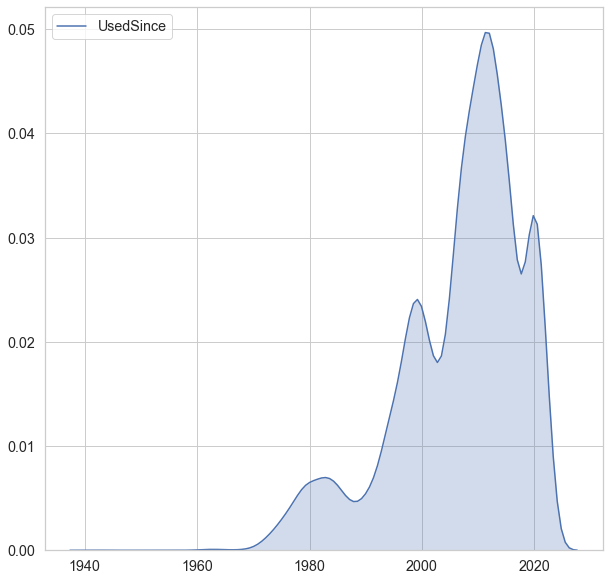

In [48]:
sns.kdeplot(df['UsedSince'],shade=True)

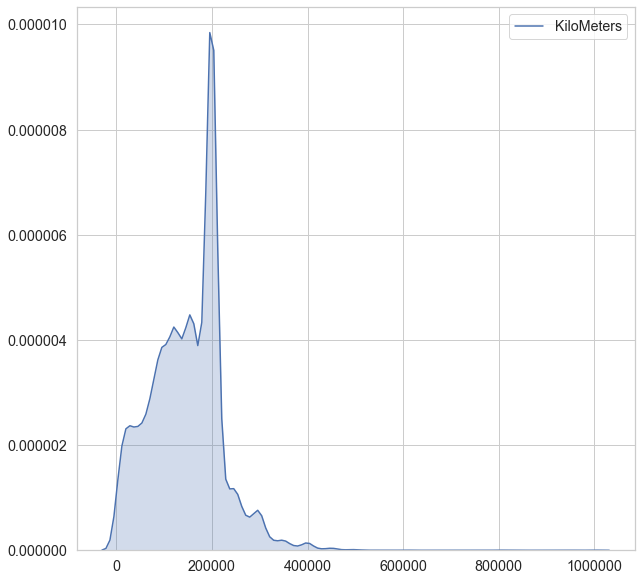

In [49]:
sns.kdeplot(df['KiloMeters'],shade=True)

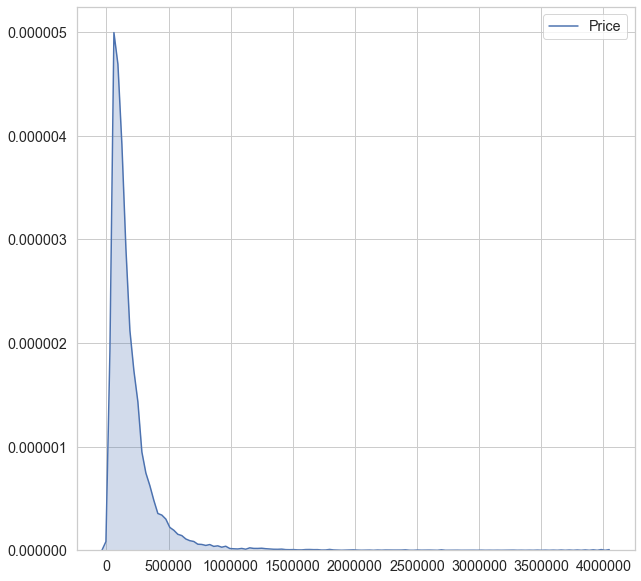

In [50]:
sns.kdeplot(df['Price'],shade=True)

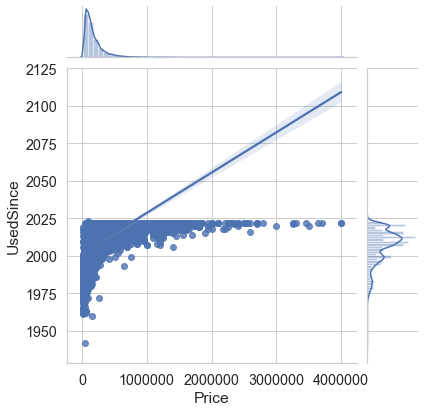

In [51]:
sns.jointplot(x='Price',y='UsedSince',data=df,kind='reg')

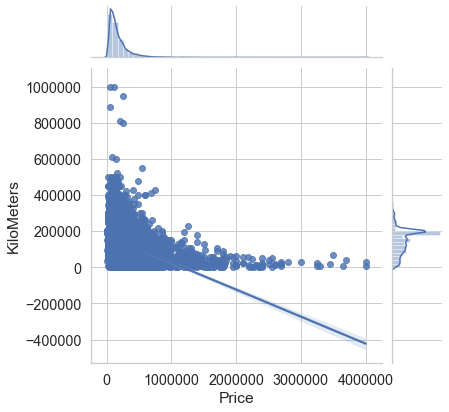

In [52]:
sns.jointplot(x='Price',y='KiloMeters',data=df,kind='reg')

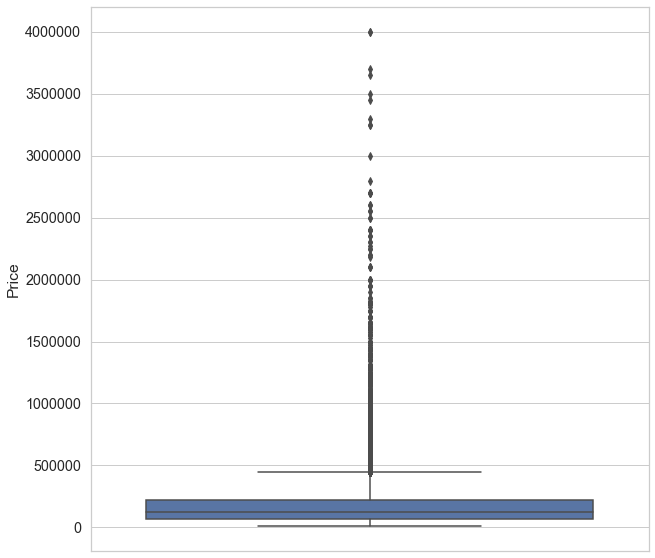

In [53]:
sns.boxplot(y='Price',data=df)

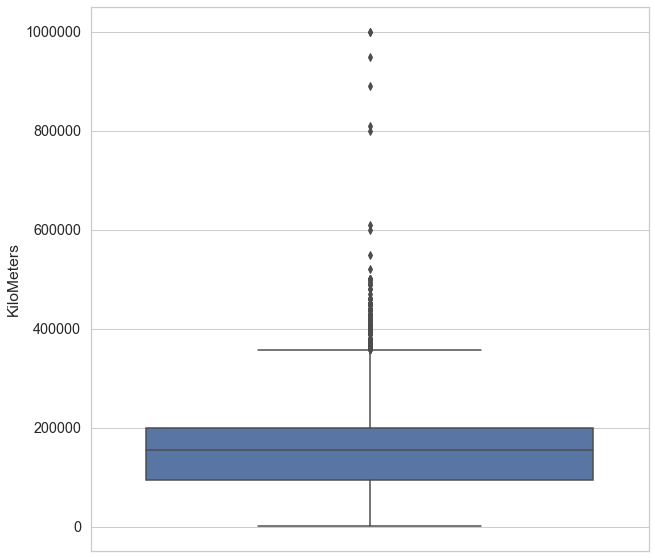

In [54]:
sns.boxplot(y='KiloMeters',data=df)

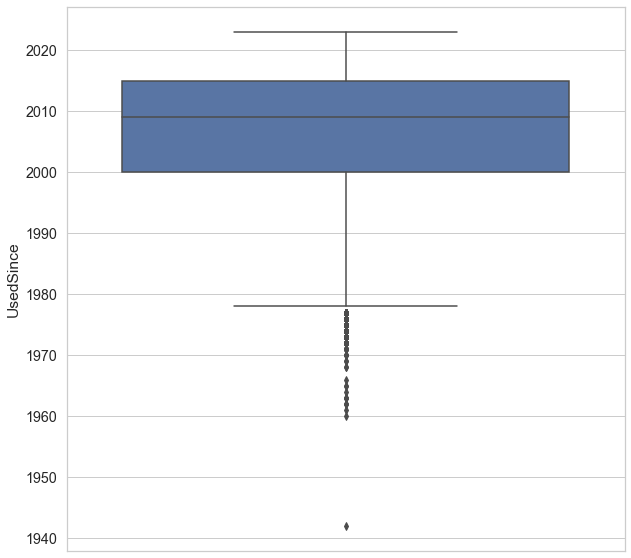

In [55]:
sns.boxplot(y='UsedSince',data=df)

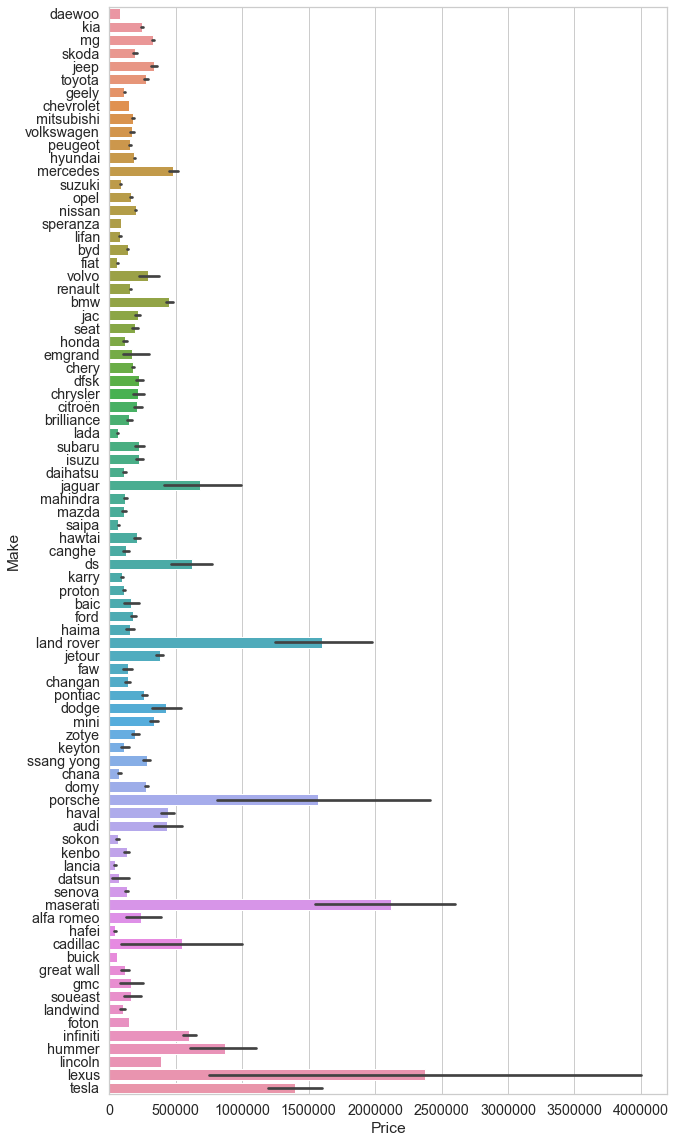

In [56]:
f, ax = plt.subplots(figsize=(10, 20))

sns.barplot(x="Price", y="Make", data=df,label="Alcohol-involved")

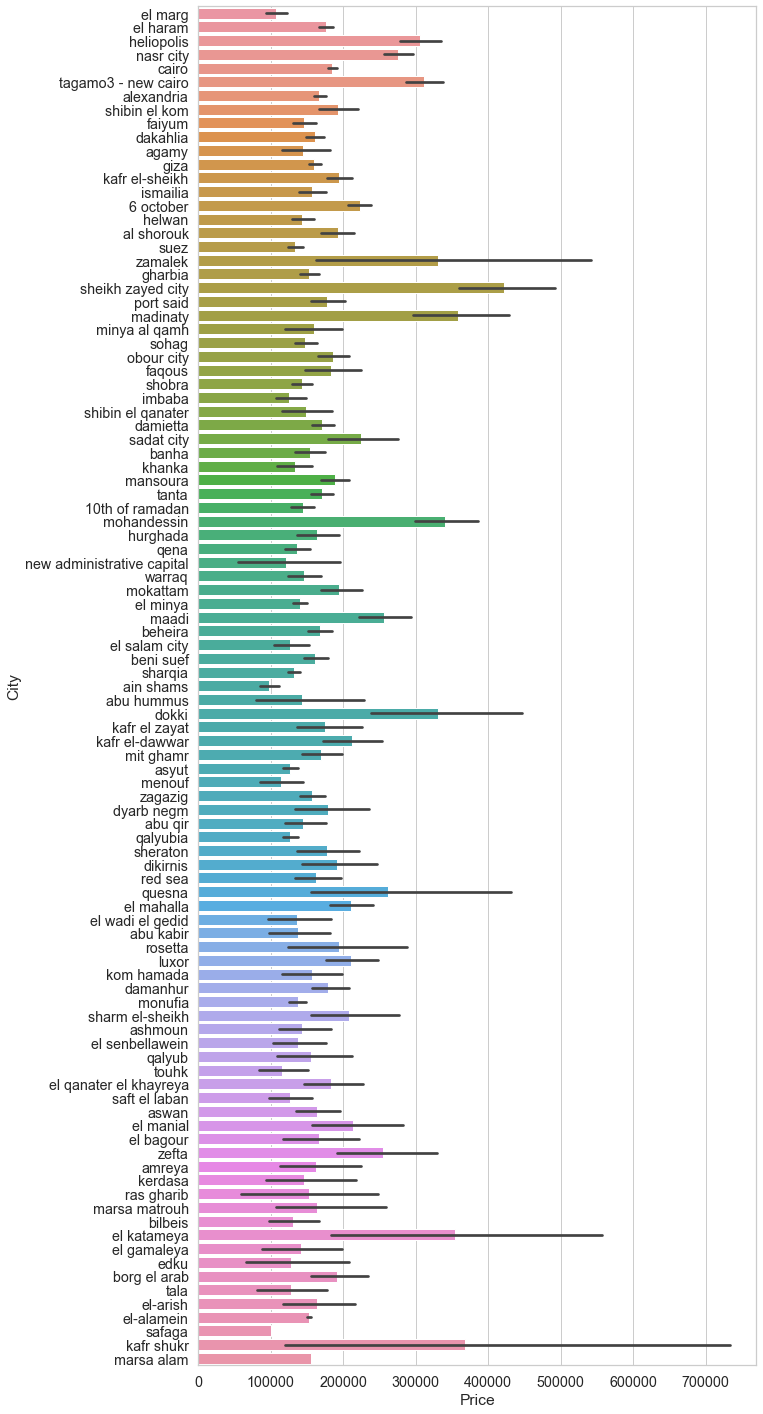

In [57]:
f, ax = plt.subplots(figsize=(10, 25))

sns.barplot(x="Price", y="City", data=df,label="Alcohol-involved")

In [58]:
def Pie(feature,limit=10) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(df[feature].value_counts()[:limit],labels = list(df[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None

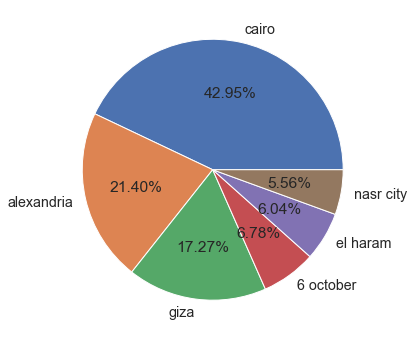

In [59]:
Pie('City',6)

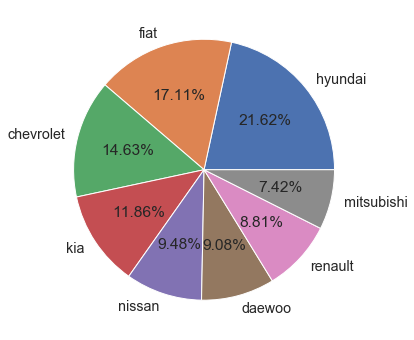

In [60]:
Pie('Make',8)

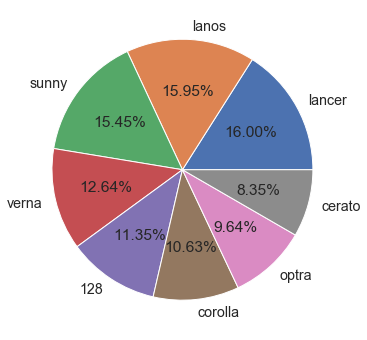

In [61]:
Pie('Model',8)

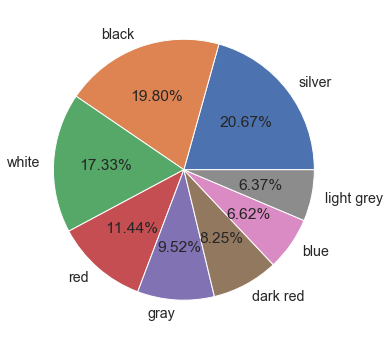

In [62]:
Pie('Color',8)

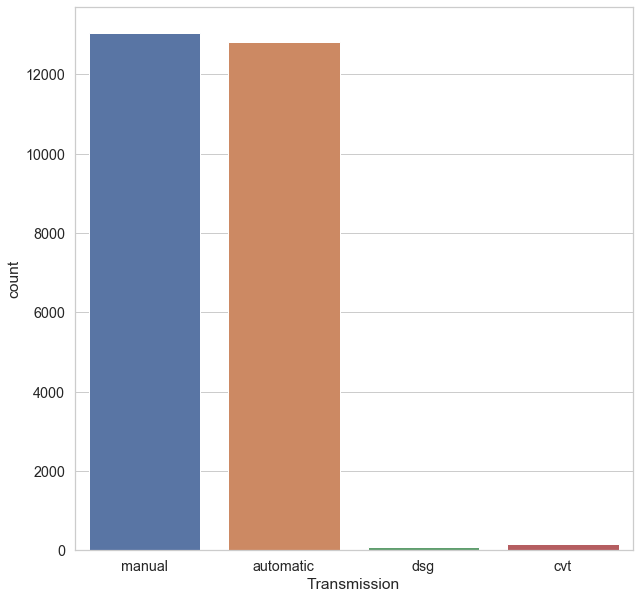

In [63]:
sns.countplot(x='Transmission',data=df)

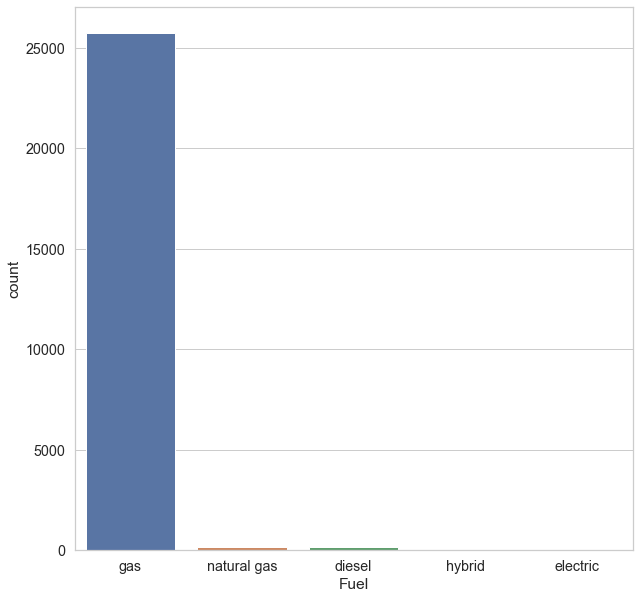

In [64]:
sns.countplot(x='Fuel',data=df)

# 5) data preparing for testing and training 

In [65]:
outliers=detect_outliers(df,0,['KiloMeters','UsedSince'])
len(outliers)

666

In [66]:
df.shape

(26103, 42)

In [67]:
for i in outliers:
    df.drop(i,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [68]:
df.shape

(25437, 42)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25437 entries, 0 to 25436
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Make                        25437 non-null  object
 1   Model                       25437 non-null  object
 2   UsedSince                   25437 non-null  int64 
 3   KiloMeters                  25437 non-null  int64 
 4   Transmission                25437 non-null  object
 5   City                        25437 non-null  object
 6   Color                       25437 non-null  object
 7   Fuel                        25437 non-null  object
 8   Price                       25437 non-null  int64 
 9   Leather seats               25437 non-null  int64 
 10  Closing mirrors             25437 non-null  int64 
 11  Intelligent parking system  25437 non-null  int64 
 12  Sunroof                     25437 non-null  int64 
 13  Fabric brushes              25437 non-null  in

In [70]:
df.columns

Index(['Make', 'Model', 'UsedSince', 'KiloMeters', 'Transmission', 'City',
       'Color', 'Fuel', 'Price', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera'],
      dtype='object')

In [71]:
label_encoder = preprocessing.LabelEncoder()

In [72]:
encols=['Make', 'Model','Transmission', 'City','Color', 'Fuel']
for i in encols:
    df[i+'Enc']=label_encoder.fit_transform(df[i])

In [73]:
df.head()

,Make,Model,UsedSince,KiloMeters,Transmission,City,Color,Fuel,Price,Leather seats,Closing mirrors,Intelligent parking system,Sunroof,Fabric brushes,Air Conditioning,Power Steering,Remote Keyless,Electric mirrors,Front Power Windows,Back Power Windows,Tinted Glass,CD Player,DVD Player,Bluetooth,Multifunction,Cassette Radio,AUX,CD Changer,USB Port,Anti - theft System,Side Airbag,ABS,EPS,EBD,ESP,Sensors,Rear sensors,Driver Airbag,Passenger Airbag,Front sensors,Alloy wheels,Rear camera,MakeEnc,ModelEnc,TransmissionEnc,CityEnc,ColorEnc,FuelEnc
0,daewoo,lanos,1999,231000,manual,el marg,dark red,gas,78000,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,15,458,3,32,9,2
1,kia,grand cerato,2020,47000,automatic,el haram,light grey,gas,450000,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,46,389,0,28,14,2
2,mg,5,2021,28000,automatic,el haram,red,gas,340000,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58,90,0,28,20,2
3,mg,zs,2020,21000,automatic,el haram,red,gas,360000,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,58,763,0,28,20,2
4,skoda,octavia a8,2022,16000,dsg,heliopolis,red,gas,890000,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,71,527,2,44,20,2


In [74]:
df.shape

(25437, 48)

In [75]:
df.columns

Index(['Make', 'Model', 'UsedSince', 'KiloMeters', 'Transmission', 'City',
       'Color', 'Fuel', 'Price', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'MakeEnc', 'ModelEnc',
       'TransmissionEnc', 'CityEnc', 'ColorEnc', 'FuelEnc'],
      dtype='object')

In [76]:
x=df.drop(['Make', 'Model','Transmission', 'City','Color', 'Fuel','Price'],axis=1)
x

,UsedSince,KiloMeters,Leather seats,Closing mirrors,Intelligent parking system,Sunroof,Fabric brushes,Air Conditioning,Power Steering,Remote Keyless,Electric mirrors,Front Power Windows,Back Power Windows,Tinted Glass,CD Player,DVD Player,Bluetooth,Multifunction,Cassette Radio,AUX,CD Changer,USB Port,Anti - theft System,Side Airbag,ABS,EPS,EBD,ESP,Sensors,Rear sensors,Driver Airbag,Passenger Airbag,Front sensors,Alloy wheels,Rear camera,MakeEnc,ModelEnc,TransmissionEnc,CityEnc,ColorEnc,FuelEnc
0,1999,231000,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,15,458,3,32,9,2
1,2020,47000,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,46,389,0,28,14,2
2,2021,28000,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58,90,0,28,20,2
3,2020,21000,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,58,763,0,28,20,2
4,2022,16000,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,71,527,2,44,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25432,2003,200000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,57,195,0,8,5,2
25433,1996,200000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,632,3,73,22,2
25434,2015,200000,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,456,0,19,14,2
25435,2008,170000,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,711,3,90,22,2


In [77]:
x.shape

(25437, 41)

In [78]:
y=df['Price']
y

0         78000
1        450000
2        340000
3        360000
4        890000
          ...  
25432    230000
25433     38000
25434    205000
25435     76000
25436     42000
Name: Price, Length: 25437, dtype: int64

In [79]:
featureselection=SelectFromModel(estimator=XGBRegressor(),max_features=None)
Xf=featureselection.fit_transform(x,y)

In [80]:
Xf.shape

(25437, 8)

In [81]:
featureselection.get_support()

array([ True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False])

In [82]:
x.columns

Index(['UsedSince', 'KiloMeters', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'MakeEnc', 'ModelEnc',
       'TransmissionEnc', 'CityEnc', 'ColorEnc', 'FuelEnc'],
      dtype='object')

In [83]:
for i in [0,3,4,5,34,35,36,37]:
    print(x.columns.tolist()[i])

UsedSince
Closing mirrors
Intelligent parking system
Sunroof
Rear camera
MakeEnc
ModelEnc
TransmissionEnc


In [84]:
finalX=df[['UsedSince','Closing mirrors','Intelligent parking system','Sunroof',
   'Rear camera','MakeEnc','ModelEnc','TransmissionEnc']]

In [85]:
finalX

,UsedSince,Closing mirrors,Intelligent parking system,Sunroof,Rear camera,MakeEnc,ModelEnc,TransmissionEnc
0,1999,0,0,0,0,15,458,3
1,2020,1,1,1,1,46,389,0
2,2021,1,0,1,0,58,90,0
3,2020,0,1,0,0,58,763,0
4,2022,1,1,1,1,71,527,2
...,...,...,...,...,...,...,...,...
25432,2003,0,0,0,0,57,195,0
25433,1996,0,0,0,0,24,632,3
25434,2015,0,0,0,0,60,456,0
25435,2008,0,0,0,0,36,711,3


In [86]:
y

0         78000
1        450000
2        340000
3        360000
4        890000
          ...  
25432    230000
25433     38000
25434    205000
25435     76000
25436     42000
Name: Price, Length: 25437, dtype: int64

In [87]:
finalX_train, finalX_test, y_train, y_test = train_test_split(finalX, y, test_size=0.25, random_state=30,shuffle=True)

In [88]:
scaler= StandardScaler()
scaler.fit(finalX_train)
finalX_train = scaler.transform(finalX_train)
finalX_test = scaler.transform(finalX_test)

In [89]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [90]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(finalX_train, y_train)
    print(f'Training Score: {model.score(finalX_train, y_train)}')
    print(f'Test Score: {model.score(finalX_test, y_test)}')
    y_pred = model.predict(finalX_test)
    print(f'Mean Absolute Error Value is:{mean_absolute_error(y_test,y_pred)}')
    print(f'Mean squared Error Value is:{mean_squared_error(y_test,y_pred)}')
    print(f'Median Absolute Error Value is:{median_absolute_error(y_test,y_pred)}')  
    print('-'*30)

Using model: LR
Training Score: 0.44285953121167354
Test Score: 0.47427862721479197
Mean Absolute Error Value is:76041.67131506631
Mean squared Error Value is:20582797017.484634
Median Absolute Error Value is:47607.412381700764
------------------------------
Using model: KNNR
Training Score: 0.8052157172247778
Test Score: 0.7341342769740821
Mean Absolute Error Value is:39500.90141509434
Mean squared Error Value is:10409050295.897024
Median Absolute Error Value is:14400.0
------------------------------
Using model: SVR
Training Score: -0.06995929852537475
Test Score: -0.06780301196203031
Mean Absolute Error Value is:107846.68198263079
Mean squared Error Value is:41806123524.01508
Median Absolute Error Value is:61922.787397869644
------------------------------
Using model: DT
Training Score: 0.9824568069362352
Test Score: 0.7830613561435882
Mean Absolute Error Value is:31489.561487301766
Mean squared Error Value is:8493480202.428911
Median Absolute Error Value is:12500.0
----------------

In [91]:
model = XGBRegressor()

model.fit(finalX_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [92]:
y_pred = model.predict(finalX_test)
y_pred

array([367764.3  , 159638.84 ,  87020.39 , ..., 254875.61 ,  39649.344,
       202136.1  ], dtype=float32)

In [93]:
y_test

18476    470000
16215    155000
22268     53000
9749     265000
19530    180000
          ...  
23490    135000
18975     55000
642      285000
14803     75000
20866    175000
Name: Price, Length: 6360, dtype: int64

# 6) saving the scaler and model

In [94]:
joblib.dump(model, 'model.hatcars2')

['model.hatcars2']

In [95]:
joblib.dump(scaler, 'scaler.hatcars2')

['scaler.hatcars2']

# 7) getting a dictionary for the original column and its encoded column for use in the server 

In [96]:
modeldict=df.groupby('Model')['ModelEnc'].unique().to_dict()

In [97]:
modeldict = {key: str(value) for key, value in modeldict.items()}
modeldict = {key: value.replace('[','') for key, value in modeldict.items()}
modeldict = {key: value.replace(']','') for key, value in modeldict.items()}
modeldict = {key: int(value) for key, value in modeldict.items()}

In [98]:
modeldict

{'1 series': 0,
 '100': 1,
 '104': 2,
 '11': 3,
 '1100': 4,
 '116': 5,
 '118': 6,
 '12': 7,
 '1200': 8,
 '121': 9,
 '124': 10,
 '125': 11,
 '126': 12,
 '127': 13,
 '128': 14,
 '130': 15,
 '1300': 16,
 '131': 17,
 '132': 18,
 '133': 19,
 '144': 20,
 '146': 21,
 '147': 22,
 '1500': 23,
 '156': 24,
 '18': 25,
 '180': 26,
 '180b': 27,
 '19': 28,
 '190': 29,
 '2 ': 30,
 '200': 31,
 '2008': 32,
 '2017': 33,
 '205': 34,
 '206': 35,
 '207': 36,
 '207 sw': 37,
 '208': 38,
 '21': 39,
 '2101': 40,
 '2104': 41,
 '2105': 42,
 '2106': 43,
 '2107': 44,
 '2110': 45,
 '2111': 46,
 '2112': 47,
 '218': 48,
 '218 i': 49,
 '220': 50,
 '225': 51,
 '230': 52,
 '240': 53,
 '244': 54,
 '25': 55,
 '250': 56,
 '280': 57,
 '280z': 58,
 '3': 59,
 '3 ': 60,
 '3 series': 61,
 '300': 62,
 '3008': 63,
 '301': 64,
 '305': 65,
 '306': 66,
 '307': 67,
 '308': 68,
 '308 sw': 69,
 '309': 70,
 '316': 71,
 '318': 72,
 '320': 73,
 '323': 74,
 '325': 75,
 '328': 76,
 '330': 77,
 '330s': 78,
 '335': 79,
 '340': 80,
 '350': 81,


In [99]:
makedict=df.groupby('Make')['MakeEnc'].unique().to_dict()

In [100]:
makedict = {key: str(value) for key, value in makedict.items()}
makedict = {key: value.replace('[','') for key, value in makedict.items()}
makedict = {key: value.replace(']','') for key, value in makedict.items()}
makedict = {key: int(value) for key, value in makedict.items()}

In [101]:
makedict

{'alfa romeo': 0,
 'audi': 1,
 'baic': 2,
 'bmw': 3,
 'brilliance': 4,
 'buick': 5,
 'byd': 6,
 'cadillac': 7,
 'canghe ': 8,
 'chana': 9,
 'changan': 10,
 'chery': 11,
 'chevrolet': 12,
 'chrysler': 13,
 'citroën': 14,
 'daewoo': 15,
 'daihatsu': 16,
 'datsun': 17,
 'dfsk': 18,
 'dodge': 19,
 'domy': 20,
 'ds': 21,
 'emgrand': 22,
 'faw': 23,
 'fiat': 24,
 'ford': 25,
 'foton': 26,
 'geely': 27,
 'gmc': 28,
 'great wall': 29,
 'hafei': 30,
 'haima': 31,
 'haval': 32,
 'hawtai': 33,
 'honda': 34,
 'hummer': 35,
 'hyundai': 36,
 'infiniti': 37,
 'isuzu': 38,
 'jac': 39,
 'jaguar': 40,
 'jeep': 41,
 'jetour': 42,
 'karry': 43,
 'kenbo': 44,
 'keyton': 45,
 'kia': 46,
 'lada': 47,
 'lancia': 48,
 'land rover': 49,
 'landwind': 50,
 'lexus': 51,
 'lifan': 52,
 'lincoln': 53,
 'mahindra': 54,
 'maserati': 55,
 'mazda': 56,
 'mercedes': 57,
 'mg': 58,
 'mini': 59,
 'mitsubishi': 60,
 'nissan': 61,
 'opel': 62,
 'peugeot': 63,
 'pontiac': 64,
 'porsche': 65,
 'proton': 66,
 'renault': 67,
 's

In [102]:
transdict=df.groupby('Transmission')['TransmissionEnc'].unique().to_dict()

In [103]:
transdict = {key: str(value) for key, value in transdict.items()}
transdict = {key: value.replace('[','') for key, value in transdict.items()}
transdict = {key: value.replace(']','') for key, value in transdict.items()}
transdict = {key: int(value) for key, value in transdict.items()}

In [104]:
transdict

{'automatic': 0, 'cvt': 1, 'dsg': 2, 'manual': 3}